# Frequency Modulation
## What is Frequency Modulation(FM) ?
Frequency Modulation is the type of Angle modulation whereby the frequency of the carrier wave is varied in accordance with the amplitude of message signal while maintaining the constant Amplitude of the Carrier Signal.


- Frequency Modulation is widely used for radio broadcasting, telecommunications and signal processing as it provides noise immunity compared to Amplitude Modulation. The Intricates of this will be discussed later on Though...

## Representation of Frequency Modulatio
The general form of a carrier signal is

$s(t) = A_c \sin(2 \pi f_c t + \theta)$

Where
- $A_c$ is the amplitude of the Carrier Signal
-$f_c$ is the Frequency of the carrier signal
- $\theta$ is the initial phase of the carrier

In Frequency Modulation the Instantenious frequency of the carrier is varied, resulting into the output signal being:

$s_{FM} = A_c \sin(\omega_c t+ 2 \pi * k_f \int_{0}^{t}m(\tau)d\tau)$

Whereby:

- $k_f$ is the Frequency sensitivity constant measure in $\frac{Hz}{V}$
  - **Frequency Sensitivity** is a proportionality factor that determines how much a carrier frequency shifts in repsonse to the *Instantenious amplitude* of the Message Signal. It determines how strongly does the message signal affect the frequency of the carrier wave.
  - The higher the $k_f$ value, the greater the *Frequency Deviation* or Shifts.
  - The lower the $k_f$ value, the lesser the frequency of the carrier signal shifts.
  
  Also, The Bandwidth highly depends on the frequency deviation. They have the following relationship:

  $\beta = \frac{\Delta f}{f_m}= \frac{k_f A_m}{f_m}$
  - So this implies that, the greater the Deviation Constant, the better the quality (More Bandwidth). and the opposite is true for Lower Deviation constant.
- $m(t) $ is the message signal
- $\int^{t}_{0}m( \tau)d\tau$ is the integral of the message signal, which introduces the Phase changes on the Modulated signal




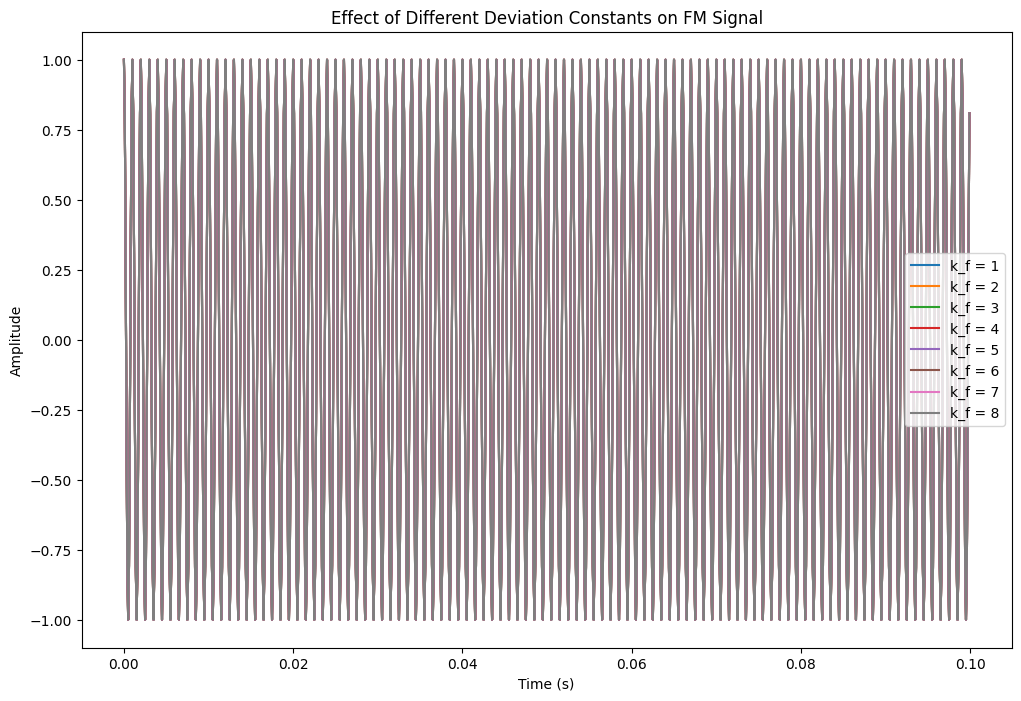

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fs = 100000  # Sampling frequency
T = 0.02     # Duration [Period]
t = np.linspace(0, 0.2, int(fs*T), endpoint=False)

fm = 50      # Modulating frequency
Am = 1       # Modulating amplitude
m_t = Am * np.cos(2 * np.pi * fm * t)  # Message signal

fc = 1000    # Carrier frequency
Ac = 1       # Carrier amplitude

kf_values = [1, 2, 3, 4, 5, 6, 7, 8]  # Different k_f values

plt.figure(figsize=(12,8))
for kf in kf_values:
    integral_m = np.cumsum(m_t) / fs
    s_fm = Ac * np.cos(2 * np.pi * fc * t + 2 * np.pi * kf * integral_m)

    plt.plot(t[:1000], s_fm[:1000], label=f"k_f = {kf}")

plt.title('Effect of Different Deviation Constants on FM Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()


## Instantateous Frequency
The Instant Frequency is given by

$f_i(t)=f_c +k_fm(t)$

From this equation, we can see that the Instant Frequency of the modulated signal is increased or decreased depending on the amplitude of the message signal


## Frequency Deviation & Modulation Index
1. Frequency Deviation is the rate at which the frequency of the carrier signal changes in accordance to the amplitude of the message signal. It is given by the following equation:

  $\Delta f = +- k_f A_m$
Whereby $A_m$ is the Maximum Amplitude of the Message signal.

- Positive Frequency Deviation:
  $F_d+ = k_f A_m$
- Negative Frequency Deviation
  $F_d- = -k_f A_m$


## Frequency Modulation Variants
Frequency Modulation can be generated using the two main ways.
1. Direct Freq Modulation
2. Indirect Freq Modulation

The distinction here is the way they produce the modulated - carrier signal's frequency variations

### Direct Frequency Modulation
- In this variation, the frequency of the carrier wave is changed directly based on the message signal, This is done by the VCO[Voltage Controlled Oscillator], which generates an output frequency based on the message signal's Amplitude. This is used in low frequency applications such as Synthesis in music. The block diagram for this process is as Follows

$Message Signal \Rightarrow VCO \Rightarrow FM OUTPUT $

### Indirect Frequency Modulation
- In this variation, The signal is modulated using the phase modulation, which indirectly modulates the frequency of the modulated signal. and this comes from the measured rate of change in frequency being affected by the phase of the signal. This is obtained through using a component called an `intergrator`, Which integrates the message signal using an RC circuit or a OP-amp .
- Basically, Indirect FM performs phase modulation, and then the output is fed into an integrator to feed the signal to the frequency signal.

## A shift from Direct to Indirect
Application of FM started being used in compex applications like military and radio broadcasting. The decline in Direct FM was realised due to Voltage Controlled Oscillators' susceptibility to temperature , aging and defects introduced during the manufacturing process.
1. Most of VCOs use Varactor Diodes, which are acting as voltage dependent capacitor, These are used to change the resonanct frequency of the LC circuit, But as the temperature flactuates, the capacitance of the diode changes non-linearly, causing frequency drifts
2. VCO's also make use of inductors, or generally, LC circuits to determine the oscillation frequency, The problem arises when inductors experience *thermal expansion* due to temperature changes, causing the inductance value to drift, leading to instability.
3. VCO's are having BJTs and JFETs in them, The trade off is that Transistor's gain or transconductance decreases with time, this affects the overall oscillation of the VCO, leading to instabilities.
4. If the circuitry used is an RC instead of LC, the capacitance's perfomance can change according to the temperature and humidity of the device.. introducing instability.
5. VCO requires a level of skill to fine-tune, which could be harder, and the modulation is not linear

## How is this instability a problem
- Radio Communication systems require the carrier wave's frequency to be stable, this is because if the frequency deviates or drifts, this may cause interference with adjecent channels. This is unnacceptable ever since Radio is used in various applications as Air-crafts, military and Radio Communication, the signal transmitted could be over-all distorted.
- The Application of Radio communication, Radio stations are oftenly given a frequency range to utilise, But VCO cannot produce a huge variation of frequency without being unstable.

## How does indirect solving this issue
In Indirect FM, frequency is not modulated directly, instead, the phase is modulated firstly and then converted into Frequency modulation. This is done through a usage of crystal oscillators, which is much more stable than VCO.

- The crystal oscillator is designed to be resistant to aging and temperature problems. This is archieved through a usage of Quarts, which have very low temperature coefficient, This means that they can withstand various temperature changes without being defective.

## Instantenous Frequecy
This is the actual frequency of the carrier wave at any given time due to modulation, instead of a fixed carrier frequency $f_c$
  $f_i(t) = f_c +k_fm(t)$
-  To derive this equation,

$s(t) = A_c \cos(\theta (t)) $
  - $ \theta (t) = $ Time Varying Phase angle

  $\theta (t) = 2\pi f_ct + 2\pi k_f \int^{t}_{0}m(\tau)d\tau$

  - To find the instant frequency, we have to derive the phase at small time interval


  $\omega = 2\pi f$


  $f = \frac{\omega}{2\pi}$

  $\frac{df}{dt} = \frac{1}{2\pi} \times \frac{d\omega}{dt}$

  $f_i(t) = \frac{1}{2\pi} \frac{d}{dt} \theta (t)$

  $f_i(t) = \frac{1}{2\pi} \frac{d}{dt} [2\pi f_ct +2\pi k_f \int^{t}_{0}m(\tau)]$

  $f_i(t) = f_c +k_fm(t)$



## Deviation Ratio

A measure of how much the frequency of the carrier singal varies relative to the highest frequency of the message signal

$DR = \frac{\Delta f}{f_{\text{m}}^{\text{max}}}$


Where -
- $\Delta f = $ **Maximum frequency deviation (Hz)**
- $f_m^{\text{max}} = $ Maximum modulating Frequency


### iMPORTANCE OF DEVIATION RATIO
Indirectly affects the bandwidth of the FM signal and also, Classifies the FM Type.
1. Wide Band FM -> Has high deviation (Radio Broadcasting) - High quality
2. Narrowband -> Low Deviation  ratio, Low quality.

## Noise
Noise originates fron various sources, Sources includes manufactureing faults,

### Thermal Noise
Thermal noise is caused by the electron within the conductor receiving thermal energy. With this, Thermal Noise is a function of a conductor temperature .

$ P_n = kT \beta $

- Whereby k is a Boltzman's Constant  = $1.38\times10^{-27}\text{Joules/kelvin}$
  -  T is the temperature of the conductor,In kelvins
  - $\beta \Rightarrow $ is the frequency bandwidth in Hertz
  - $P_n \Rightarrow $ Average noise power in watts.

## The Q factor with Respect to the Frequency selective Components
Q Factor is the quaility factor, which characterises the energy efficiency of a Freqeuncy selective components or circuit.
Q factor is the measure at which the component/ circuitry stores energy with respect to how much energy it dissipates or release.

$Q_{factor} = \frac{F_{res}}{\beta}$


The Q factor is The resonance frequency devided by the Bandwidth.

Resonance Frequency is defined as the point whereby the gain of the Filter decreases by 3dB
Resonance frequency is a point whereby the Reactance of the Inductor or Capacitor is equivalent to te Resistance in an RL, Conversely similar in RC circuit.

---




# Gain Calculations
- $Gain_{\text{db}} = 10\log_{10}(\frac{\hat P_f}{P_i})$
- If You are adding two Decibels, dB and dBm? or even with another dBW? Look at these

- $\text{Gain}_{\text{dBm}} = 10 \log_{10}(\frac{P_f}{1\text{mW}})$
  - $\text{Gain}_{\text{dBm}} = 10 \log_{10}(\frac{P_f}{1\text{W}} \times \frac{1}{10^{-3}})$
  - $\text{Gain}_{\text{dBm}} = 10[\log_{10}(\frac{P_f}{1W})-\log_{10}(10^3)]$
  - $\text{Gain}_{\text{dBm}} = 10\log_{10}(\frac{P_f}{1W})- 30$
  - <u> $\therefore dBm = dBW - 30$ </u>
- For the convention
  - $\frac{\text{dBm}}{10} = \log_{10}(\frac{P_f}{1mW})$
  - $\frac{\text{dBm}}{10}\times \log(10) = \log(\frac{P_f}{1mW}) $
  - $ 10^{\frac{\text{dBm}}{10}} = \frac{P_f}{1mW} $
  - $ 10^{\frac{\text{dBm}}{10}} = P_{\text{mW}} $

In [43]:
import math


Voltage = 8e-6
Resistance = 50
Powers = 8+3+24+26+26-2+34
input_power = ((Voltage**2)/Resistance)*1000
Power = input_power * (10**(Powers/10)) # This is in milliwarts too
print(Power) # This is in milliwatts
Power_dBm = 10*math.log10(Power)
Power_dBm

1016.740140447081


30.072099696478688

# Bessel Equations

From our original Equation, $e = \sin(\omega_c t - m_f \cos(\omega_mt))$, we can transform this to re-write it in the exponential form:

$\sin(\omega_ct) = \frac{1}{2\text{j}}\times [e^{j\omega_ct}-e^{-j\omega_ct}]$.

Use the **Jacobi-Anger Expansion** to approximate this function:

$\Sigma^{\infty}_{n=-\infty}(\text{J}_n(x)e^{jn\theta}) = e^{jx\cos(\theta)}$

- $\therefore \sin(\omega_c t - m_f \cos(\omega_mt)) = \frac{1}{2\text{j}}\times [e^{j(\omega_c t - m_f \cos(\omega_mt))}-e^{-j(\omega_c t - m_f \cos(\omega_mt))}]$

- $ [e^{j(\omega_c t - m_f \cos(\omega_mt))}-e^{-j(\omega_c t - m_f \cos(\omega_mt))}] = \Sigma^{\infty}_{n=-\infty}(\text{J}_n(m_f)e^{-jn\omega_mt+j\omega_ct}) $
- $ [e^{j(\omega_c t - m_f \cos(\omega_mt))}-e^{-j(\omega_c t - m_f \cos(\omega_mt))}] = e^{j\omega_ct}\Sigma^{\infty}_{n=-\infty}(\text{J}_n(m_f)e^{-jn\omega_mt}) $

  

- $e =\frac{1}{2\text{j}} e^{j\omega_ct}[\Sigma^{\infty}_{n=-\infty}(\text{J}_n(m_f)e^{-jn\omega_mt}) -\Sigma^{\infty}_{n=-\infty}(\text{J}_n(m_f)e^{jn\omega_mt}) ]$

- $ e = \Sigma^{\infty}_{n=-\infty}\text{J}_n(m_f) \sin(\omega_ct - n\omega_mt)$

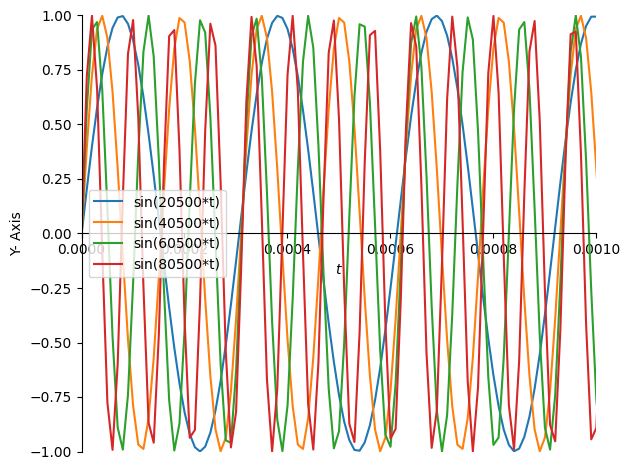

In [63]:
import sympy as sm

t, omega_c, omega_m, m_f = sm.symbols('t omega_c omega_m m_f')
omega_c = 500
omega_m = 200
m_f = 100
j1 = sm.sin(omega_c*t + 1*omega_m*m_f*t)
j2 = sm.sin(omega_c*t + 2*m_f*omega_m*t)
j3 = sm.sin(omega_c*t + 3*m_f*omega_m*t)
j4 = sm.sin(omega_c*t + 4*m_f*omega_m*t)
sm.plot(j1, j2, j3, j4, (t, 0, 0.01), show=True, ylabel='Y- Axis', legend=True, ylim=(-1,1), xlim=(0, 0.001))
